In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

# Part 1

Complete the exercises found [here](https://github.com/AllenDowney/ModSimPy/blob/master/notebooks/chap04.ipynb).

## Returning values

Here's a simple function that returns a value:

In [2]:
def add_five(x):
    return x + 5

And here's how we call it.

In [3]:
y = add_five(3)

8

If you run a function on the last line of a cell, Jupyter displays the result:

In [4]:
add_five(5)

10

But that can be a bad habit, because usually if you call a function and don't assign the result in a variable, the result gets discarded.

In the following example, Jupyter shows the second result, but the first result just disappears.

In [5]:
add_five(3)
add_five(5)

10

When you call a function that returns a variable, it is generally a good idea to assign the result to a variable.

In [6]:
y1 = add_five(3)
y2 = add_five(5)

print(y1, y2)

8 10


**Exercise:** Write a function called `make_state` that creates a `State` object with the state variables `olin=10` and `wellesley=2`, and then returns the new `State` object.

Write a line of code that calls `make_state` and assigns the result to a variable named `init`.

In [7]:
# Solution goes here

def make_state():
    return(State(olin=10, wellesley=2))

In [8]:
init = make_state()
init

,values
olin,10
wellesley,2


## Running simulations

Here's the code from the previous notebook.

In [9]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')

Here's a modified version of `run_simulation` that creates a `State` object, runs the simulation, and returns the `State` object.

In [10]:
def run_simulation(p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)
                    
    for i in range(num_steps):
        step(state, p1, p2)
        
    return state

Now `run_simulation` doesn't plot anything:

In [11]:
state = run_simulation(0.4, 0.2, 60)

,values
olin,6
wellesley,6
olin_empty,0
wellesley_empty,0


But after the simulation, we can read the metrics from the `State` object.

In [12]:
state.olin_empty

0

Now we can run simulations with different values for the parameters.  When `p1` is small, we probably don't run out of bikes at Olin.

In [13]:
state = run_simulation(0.2, 0.2, 60)
state.olin_empty

0

When `p1` is large, we probably do.

In [14]:
state = run_simulation(0.6, 0.2, 60)
state.olin_empty

15

## More for loops

`linspace` creates a NumPy array of equally spaced numbers.

In [15]:
p1_array = linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

We can use an array in a `for` loop, like this:

In [16]:
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


This will come in handy in the next section.

`linspace` is defined in `modsim.py`.  You can get the documentation using `help`.

In [17]:
help(linspace)

Help on function linspace in module modsim.modsim:

linspace(start, stop, num=50, **options)
    Returns an array of evenly-spaced values in the interval [start, stop].
    
    start: first value
    stop: last value
    num: number of values
    
    Also accepts the same keyword arguments as np.linspace.  See
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    
    returns: array or Quantity



`linspace` is based on a NumPy function with the same name.  [Click here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to read more about how to use it.

**Exercise:** 
Use `linspace` to make an array of 10 equally spaced numbers from 1 to 10 (including both).

In [18]:
# Solution goes here

np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

**Exercise:** The `modsim` library provides a related function called `linrange`.  You can view the documentation by running the following cell:

In [19]:
help(linrange)

Help on function linrange in module modsim.modsim:

linrange(start=0, stop=None, step=1, endpoint=False, **options)
    Returns an array of evenly-spaced values in an interval.
    
    By default, the last value in the array is `stop-step`
    (at least approximately).
    If you provide the keyword argument `endpoint=True`,
    the last value in the array is `stop`.
    
    This function works best if the space between start and stop
    is divisible by step; otherwise the results might be surprising.
    
    start: first value
    stop: last value
    step: space between values
    
    returns: NumPy array



Use `linrange` to make an array of numbers from 1 to 11 with a step size of 2.

In [20]:
# Solution goes here

linrange(1, 11, 2)

array([1, 3, 5, 7, 9])

## Sweeping parameters

`p1_array` contains a range of values for `p1`.

In [21]:
p2 = 0.2
num_steps = 60
p1_array = linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

The following loop runs a simulation for each value of `p1` in `p1_array`; after each simulation, it prints the number of unhappy customers at the Olin station:

In [22]:
for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    print(p1, state.olin_empty)

0.0 0
0.1 0
0.2 0
0.30000000000000004 0
0.4 0
0.5 12
0.6000000000000001 17
0.7000000000000001 22
0.8 32
0.9 34
1.0 45


Now we can do the same thing, but storing the results in a `SweepSeries` instead of printing them.



In [23]:
sweep = SweepSeries()

for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    sweep[p1] = state.olin_empty

In [24]:
sweep

,values
0.0,0
0.1,0
0.2,0
0.3,0
0.4,0
0.5,7
0.6,17
0.7,14
0.8,32
0.9,26


And then we can plot the results.

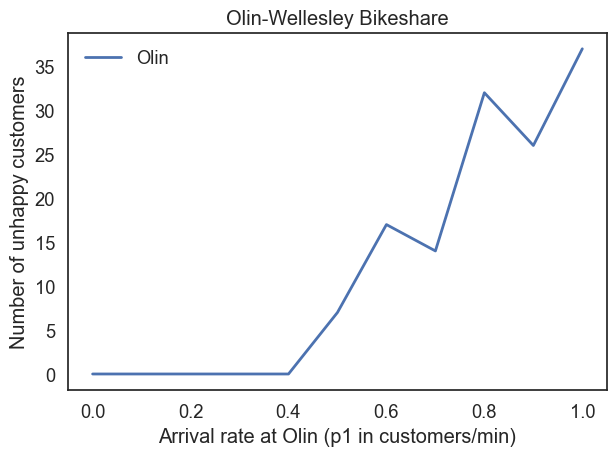

In [25]:
plot(sweep, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

## Exercises

**Exercise:** Wrap this code in a function named `sweep_p1` that takes an array called `p1_array` as a parameter.  It should create a new `SweepSeries`, run a simulation for each value of `p1` in `p1_array`, store the results in the `SweepSeries`, and return the `SweepSeries`.

Use your function to plot the number of unhappy customers at Olin as a function of `p1`.  Label the axes.

In [26]:
# Solution goes here

def sweep_p1(p1_array):
    sweep = SweepSeries()

    for p1 in p1_array:
        state = run_simulation(p1, 0.2, num_steps)
        sweep[p1] = state.olin_empty
    
    return sweep

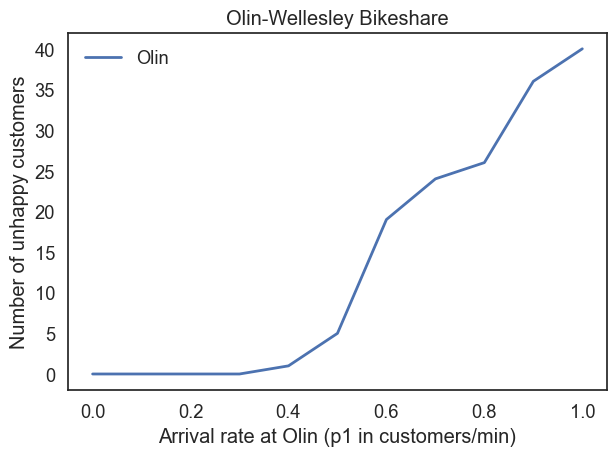

In [27]:
# Solution goes here

sweep_test = sweep_p1(p1_array)

plot(sweep_test, label='Olin')
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

**Exercise:** Write a function called `sweep_p2` that runs simulations with `p1=0.5` and a range of values for `p2`.  It should store the results in a `SweepSeries` and return the `SweepSeries`.


In [28]:
# Solution goes here

def sweep_p2(p2_array):
    sweep = SweepSeries()

    for p1 in p1_array:
        state = run_simulation(0.5, p2, num_steps)
        sweep[p1] = state.olin_empty
    
    return sweep

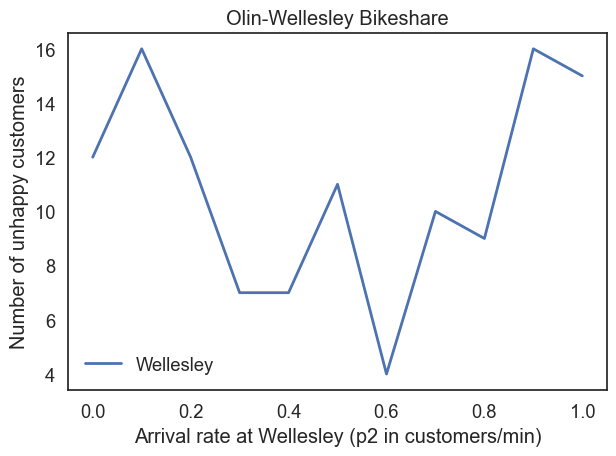

In [29]:
# Solution goes here

p2_array = np.linspace(0.1, 1, 9)

sweep_test = sweep_p2(p2_array)
plot(sweep_test, label='Wellesley')
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Wellesley (p2 in customers/min)', 
         ylabel='Number of unhappy customers')

## Optional Exercises

The following two exercises are a little more challenging.  If you are comfortable with what you have learned so far, you should give them a try.  If you feel like you have your hands full, you might want to skip them for now.

**Exercise:** Because our simulations are random, the results vary from one run to another, and the results of a parameter sweep tend to be noisy.  We can get a clearer picture of the relationship between a parameter and a metric by running multiple simulations with the same parameter and taking the average of the results.

Write a function called `run_multiple_simulations` that takes as parameters `p1`, `p2`, `num_steps`, and `num_runs`.

`num_runs` specifies how many times it should call `run_simulation`.

After each run, it should store the total number of unhappy customers (at Olin or Wellesley) in a `TimeSeries`.  At the end, it should return the `TimeSeries`.

Test your function with parameters

```
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10
```

Display the resulting `TimeSeries` and use the `mean` function provided by the `TimeSeries` object to compute the average number of unhappy customers (see Section 2.7).

In [30]:
# Solution goes here

def run_multiple_simulations(p1, p2, num_steps, num_runs):
    num_unhappy_o = TimeSeries()
    num_unhappy_w = TimeSeries()
    for i in range(num_runs):
        state = run_simulation(p1, p2, num_steps)
        num_unhappy_o[i] = state.olin_empty
        num_unhappy_w[i] = state.wellesley_empty
    
    return((num_unhappy_o.mean(), num_unhappy_w.mean()))

In [31]:
# Solution goes here

run_multiple_simulations(0.3, 0.3, 60 , 10)

(0.0, 1.6)

**Exercise:**  Continuting the previous exercise, use `run_multiple_simulations` to run simulations with a range of values for `p1` and

```
p2 = 0.3
num_steps = 60
num_runs = 20
```

Store the results in a `SweepSeries`, then plot the average number of unhappy customers as a function of `p1`.  Label the axes.

What value of `p1` minimizes the average number of unhappy customers?

In [32]:
# Solution goes here

sweep = SweepSeries()

for p1 in p1_array:
    sweep[p1] = run_multiple_simulations(p1, 0.3, 60, 20)[0]

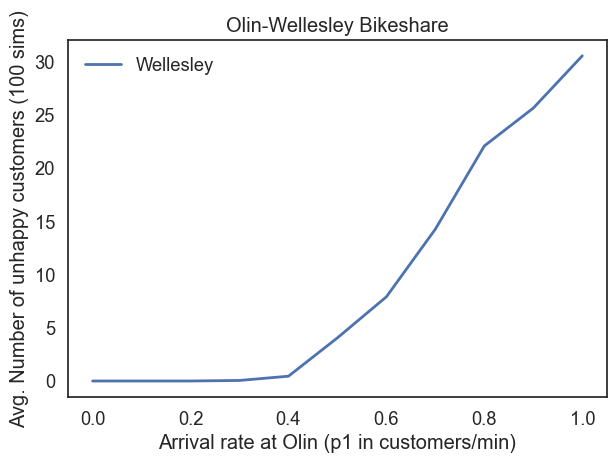

In [33]:
# Solution goes here

plot(sweep, label='Wellesley')
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Avg. Number of unhappy customers (100 sims)')

It looks as though 0.4 is the maximum allowable value of `p1` before the number of unhappy customers begins to skyrocket. 

# Part 2

Complete the exercises found [here](https://github.com/AllenDowney/ModSimPy/blob/master/notebooks/chap05.ipynb).

## Reading data

Pandas is a library that provides tools for reading and processing data.  `read_html` reads a web page from a file or the Internet and creates one `DataFrame` for each table on the page.

In [34]:
from pandas import read_html

The data directory contains a downloaded copy of https://en.wikipedia.org/wiki/World_population_estimates

The arguments of `read_html` specify the file to read and how to interpret the tables in the file.  The result, `tables`, is a sequence of `DataFrame` objects; `len(tables)` reports the length of the sequence.

In [35]:
filename = 'Data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

6

We can select the `DataFrame` we want using the bracket operator.  The tables are numbered from 0, so `tables[2]` is actually the third table on the page.

`head` selects the header and the first five rows.

In [36]:
table2 = tables[2]
table2.head()

,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`tail` selects the last five rows.

In [37]:
table2.tail()

,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,,
2012,7013871313,7.057075e+09,7.080072e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,7092128094,7.136796e+09,7.162119e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7169968185,7.238184e+09,7.243784e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,7247892788,7.336435e+09,7.349472e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,7325996709,7.418152e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Long column names are awkard to work with, but we can replace them with abbreviated names.

In [38]:
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

Here's what the DataFrame looks like now.  

In [39]:
table2.head()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first column, which is labeled `Year`, is special.  It is the **index** for this `DataFrame`, which means it contains the labels for the rows.

Some of the values use scientific notation; for example, `2.544000e+09` is shorthand for $2.544 \cdot 10^9$ or 2.544 billion.

`NaN` is a special value that indicates missing data.

### Series

We can use dot notation to select a column from a `DataFrame`.  The result is a `Series`, which is like a `DataFrame` with a single column.

In [40]:
census = table2.census
census.head()

Year
1950    2557628654
1951    2594939877
1952    2636772306
1953    2682053389
1954    2730228104
Name: census, dtype: int64

In [41]:
census.tail()

Year
2012    7013871313
2013    7092128094
2014    7169968185
2015    7247892788
2016    7325996709
Name: census, dtype: int64

Like a `DataFrame`, a `Series` contains an index, which labels the rows.

`1e9` is scientific notation for $1 \cdot 10^9$ or 1 billion.

From here on, we will work in units of billions.

In [42]:
un = table2.un / 1e9
un.head()

Year
1950    2.525149
1951    2.572851
1952    2.619292
1953    2.665865
1954    2.713172
Name: un, dtype: float64

In [43]:
census = table2.census / 1e9
census.head()

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
Name: census, dtype: float64

Here's what these estimates look like.

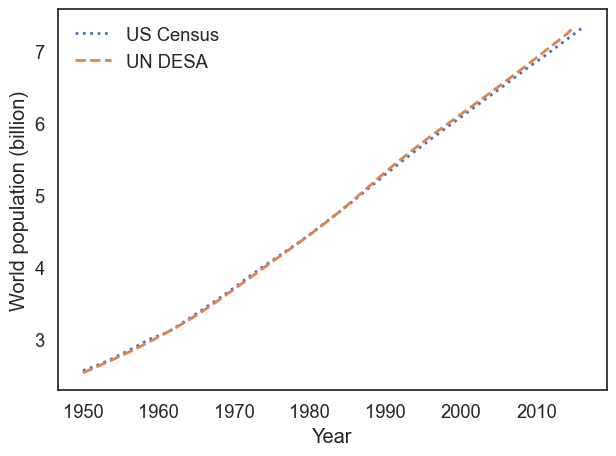

In [44]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year',
         ylabel='World population (billion)')

#savefig('figs/chap05-fig01.pdf')

The following expression computes the elementwise differences between the two series, then divides through by the UN value to produce [relative errors](https://en.wikipedia.org/wiki/Approximation_error), then finds the largest element.

So the largest relative error between the estimates is about 1.3%.

In [45]:
max(abs(census - un) / un) * 100

1.3821293828998855

**Exercise:** Break down that expression into smaller steps and display the intermediate results, to make sure you understand how it works.

1.  Compute the elementwise differences, `census - un`
2.  Compute the absolute differences, `abs(census - un)`
3.  Compute the relative differences, `abs(census - un) / un`
4.  Compute the percent differences, `abs(census - un) / un * 100`


In [46]:
# Solution goes here

census - un

Year
1950    0.032480
1951    0.022089
1952    0.017480
1953    0.016188
1954    0.017056
          ...   
2012   -0.066201
2013   -0.069991
2014   -0.073816
2015   -0.101579
2016         NaN
Length: 67, dtype: float64

In [47]:
# Solution goes here

abs(census - un)

Year
1950    0.032480
1951    0.022089
1952    0.017480
1953    0.016188
1954    0.017056
          ...   
2012    0.066201
2013    0.069991
2014    0.073816
2015    0.101579
2016         NaN
Length: 67, dtype: float64

In [48]:
# Solution goes here

abs(census - un) / un

Year
1950    0.012862
1951    0.008585
1952    0.006674
1953    0.006072
1954    0.006286
          ...   
2012    0.009350
2013    0.009772
2014    0.010190
2015    0.013821
2016         NaN
Length: 67, dtype: float64

In [49]:
# Solution goes here

abs(census - un) / un * 100

Year
1950    1.286247
1951    0.858540
1952    0.667365
1953    0.607232
1954    0.628640
          ...   
2012    0.935034
2013    0.977243
2014    1.019023
2015    1.382129
2016         NaN
Length: 67, dtype: float64

`max` and `abs` are built-in functions provided by Python, but NumPy also provides version that are a little more general.  When you import `modsim`, you get the NumPy versions of these functions.

### Constant growth

We can select a value from a `Series` using bracket notation.  Here's the first element:

In [50]:
census[1950]

2.557628654

And the last value.

In [51]:
census[2016]

7.325996709

But rather than "hard code" those dates, we can get the first and last labels from the `Series`:

In [52]:
t_0 = get_first_label(census)

1950

In [53]:
t_end = get_last_label(census)

2016

In [54]:
elapsed_time = t_end - t_0

66

And we can get the first and last values:

In [55]:
p_0 = get_first_value(census)

2.557628654

In [56]:
p_end = get_last_value(census)

7.325996709

Then we can compute the average annual growth in billions of people per year.

In [57]:
total_growth = p_end - p_0

4.768368055

In [58]:
annual_growth = total_growth / elapsed_time

0.07224800083333333

### TimeSeries

Now let's create a `TimeSeries` to contain values generated by a linear growth model.

In [59]:
results = TimeSeries();

Initially the `TimeSeries` is empty, but we can initialize it so the starting value, in 1950, is the 1950 population estimated by the US Census.

In [60]:
results[t_0] = census[t_0]
results

,values
1950,2.557629


After that, the population in the model grows by a constant amount each year.

In [61]:
for t in linrange(t_0, t_end):
    results[t+1] = results[t] + annual_growth

Here's what the results looks like, compared to the actual data.

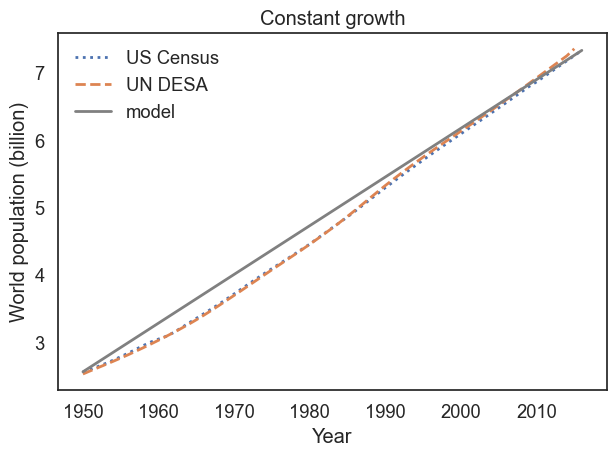

In [62]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')

#savefig('figs/chap05-fig02.pdf')

The model fits the data pretty well after 1990, but not so well before.

### Exercises

**Optional Exercise:**  Try fitting the model using data from 1970 to the present, and see if that does a better job.

Hint: 

1. Copy the code from above and make a few changes.  Test your code after each small change.

2. Make sure your `TimeSeries` starts in 1950, even though the estimated annual growth is based on later data.

3. You might want to add a constant to the starting value to match the data better.

In [63]:
# Solution goes here

results = TimeSeries()
t_0 = 1970
results[t_0] = census[t_0]
for t in linrange(t_0, t_end):
    results[t+1] = results[t] + annual_growth

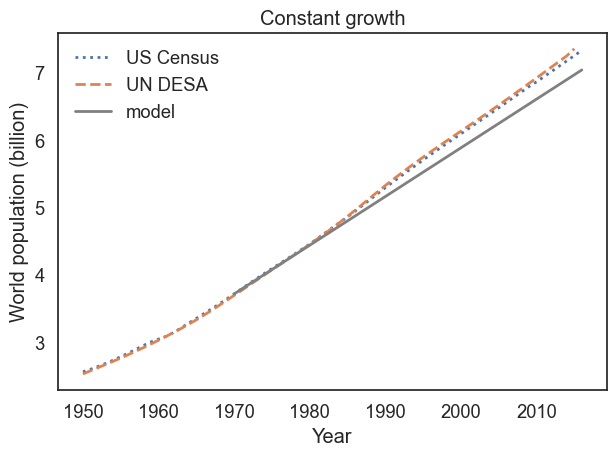

In [64]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')

Creating a linear model using the start date of 1970 provides a better fit for the earlier data, but starts to deviate once it reaches present day. 